# Forcasting Sale of Supermarket
A supermarket has various departments, and it must
stock up items that will be in demand in
each of these departments. However, while
stocking up, it must make sure that it does
not have excessive stock.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv(r"C:\Users\nimis\OneDrive\Desktop\superstore\train.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df["Order Date"]=pd.to_datetime(df["Order Date"],format= '%d/%m/%Y')
df["Ship Date"]=pd.to_datetime(df["Ship Date"],format= '%d/%m/%Y')
df=df.drop(['Row ID','Order ID','Customer ID','Customer Name','Country','Postal Code','Product ID'],axis=1)

In [7]:
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,2016-01-12,2016-01-17,Standard Class,Corporate,Toledo,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,2016-01-12,2016-01-17,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,GE 30524EE4,235.1880
9798,2016-01-12,2016-01-17,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [8]:
df_city_sales=df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)

C:\Users\nimis\AppData\Local\Temp\ipykernel_4580\2174860357.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city_sales=df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)


Text(0, 0.5, 'Sales in millions')

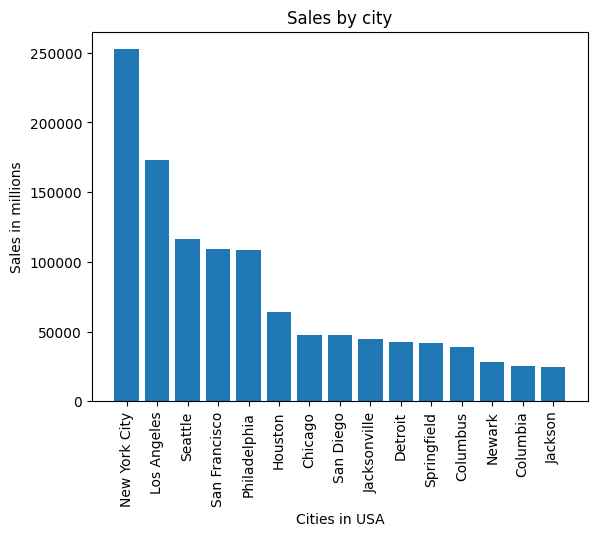

In [9]:
plt.bar(df_city_sales.index,df_city_sales["Sales"])
plt.xticks(rotation=90)
plt.title("Sales by city")
plt.xlabel("Cities in USA")
plt.ylabel("Sales in millions")

<BarContainer object of 3 artists>

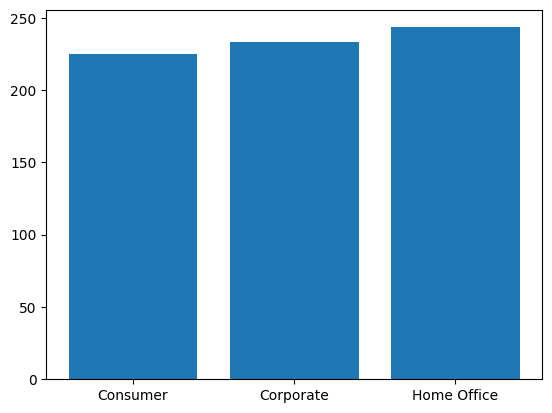

In [10]:
df
grouped_segment=df.groupby("Segment")['Sales'].mean()
# import plotly.express as px
# px.bar(grouped_segment,x=grouped_segment.index,y=grouped_segment.values,title=("Total Sales data for different segment "))

plt.bar(grouped_segment.index,grouped_segment.values)

In [11]:
for i in range(0,len(df.columns)):
    print("COLUMN_NAME",df.columns[i],"NO OF UNIQUE VALUES",len(df[df.columns[i]].unique()),df[df.columns[i]].unique())

COLUMN_NAME Order Date NO OF UNIQUE VALUES 1230 ['2017-11-08T00:00:00.000000000' '2017-06-12T00:00:00.000000000'
 '2016-10-11T00:00:00.000000000' ... '2015-06-18T00:00:00.000000000'
 '2018-02-28T00:00:00.000000000' '2016-05-09T00:00:00.000000000']
COLUMN_NAME Ship Date NO OF UNIQUE VALUES 1326 ['2017-11-11T00:00:00.000000000' '2017-06-16T00:00:00.000000000'
 '2016-10-18T00:00:00.000000000' ... '2015-03-12T00:00:00.000000000'
 '2018-04-06T00:00:00.000000000' '2016-05-13T00:00:00.000000000']
COLUMN_NAME Ship Mode NO OF UNIQUE VALUES 4 ['Second Class' 'Standard Class' 'First Class' 'Same Day']
COLUMN_NAME Segment NO OF UNIQUE VALUES 3 ['Consumer' 'Corporate' 'Home Office']
COLUMN_NAME City NO OF UNIQUE VALUES 529 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilb

In [12]:
Furniture_df=df[df.Category=="Furniture"]
Office_Supplies_df=df[df.Category=="Office Supplies"]
Technology_df=df[df.Category=="Technology"]

In [13]:
print("Furniture: ",Furniture_df.shape,"Office Supplies: ",Office_Supplies_df.shape,"Technology: ",Technology_df.shape)

Furniture:  (2078, 11) Office Supplies:  (5909, 11) Technology:  (1813, 11)


In [14]:
Furniture_df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [15]:
Office_Supplies_df['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [16]:
Technology_df['Sub-Category'].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

In [17]:
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,2016-01-12,2016-01-17,Standard Class,Corporate,Toledo,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,2016-01-12,2016-01-17,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,GE 30524EE4,235.1880
9798,2016-01-12,2016-01-17,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [18]:
Furniture_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 9792
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2078 non-null   datetime64[ns]
 1   Ship Date     2078 non-null   datetime64[ns]
 2   Ship Mode     2078 non-null   object        
 3   Segment       2078 non-null   object        
 4   City          2078 non-null   object        
 5   State         2078 non-null   object        
 6   Region        2078 non-null   object        
 7   Category      2078 non-null   object        
 8   Sub-Category  2078 non-null   object        
 9   Product Name  2078 non-null   object        
 10  Sales         2078 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 194.8+ KB


In [19]:
Furniture_grouped=Furniture_df.groupby('Sub-Category')
Office_grouped=Office_Supplies_df.groupby('Sub-Category')
Techno_grouped=Technology_df.groupby("Sub-Category")
for cat,cat_df in Furniture_grouped:
    print(cat)
    print(cat_df)

Bookcases
     Order Date  Ship Date       Ship Mode      Segment           City  \
0    2017-11-08 2017-11-11    Second Class     Consumer      Henderson   
27   2016-09-17 2016-09-21  Standard Class     Consumer   Philadelphia   
38   2016-12-27 2016-12-31  Standard Class  Home Office        Houston   
189  2016-10-12 2016-10-14     First Class  Home Office  New York City   
192  2016-10-12 2016-10-14     First Class  Home Office  New York City   
...         ...        ...             ...          ...            ...   
9649 2017-11-26 2017-11-30  Standard Class     Consumer    Los Angeles   
9691 2016-11-13 2016-11-17  Standard Class     Consumer        Houston   
9741 2016-11-08 2016-11-12  Standard Class    Corporate     Burlington   
9769 2017-11-24 2017-11-30  Standard Class  Home Office        Hialeah   
9787 2018-03-27 2018-04-01  Standard Class     Consumer        Houston   

             State   Region   Category Sub-Category  \
0         Kentucky    South  Furniture    Book

In [20]:
Furniture_grouped.get_group('Bookcases').head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
27,2016-09-17,2016-09-21,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300
38,2016-12-27,2016-12-31,Standard Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992
189,2016-10-12,2016-10-14,First Class,Home Office,New York City,New York,East,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360
192,2016-10-12,2016-10-14,First Class,Home Office,New York City,New York,East,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520


In [21]:
len(Furniture_df['Sub-Category'].unique())

4

In [22]:
arr_1=Furniture_df['Sub-Category'].unique()
arr_2=Office_Supplies_df['Sub-Category'].unique()
arr_3=Technology_df['Sub-Category'].unique()


In [23]:
def unique_values(arr):
    for i in range(len(arr)):
        print(arr[i])
    
    

In [24]:
unique_values(arr_1)

Bookcases
Chairs
Tables
Furnishings


In [25]:
unique_values(arr_2)

Labels
Storage
Art
Binders
Appliances
Paper
Envelopes
Fasteners
Supplies


In [26]:
unique_values(arr_3)

Phones
Accessories
Machines
Copiers


In [27]:
#Furniture sales by Region
Furniture_df.groupby(["Sub-Category","Region",]).describe()

Sales                                              \
                      count        mean         std      min        25%   
Sub-Category Region                                                       
Bookcases    Central   49.0  485.177780  444.342059  67.9932  205.33280   
             East      70.0  625.990486  917.401096  35.4900  184.48800   
             South     28.0  389.262929  339.586581  61.9600  231.92000   
             West      79.0  447.098627  509.184064  48.5800  147.01050   
Chairs       Central  151.0  545.515073  566.971883  26.6400  194.66600   
             East     167.0  572.979096  646.319355  47.9920  177.26400   
             South     86.0  520.223791  502.897274  33.9400  199.33800   
             West     203.0  492.725123  468.888789  40.7840  193.16000   
Furnishings  Central  198.0   75.838404  142.452898   1.8920   12.30100   
             East     275.0  102.346640  152.731698   2.9600   22.42400   
             South    162.0  105.325062  164.029144   2.7840   19.58000   
             West     296.0   97.932527  138.504298   3.4800   21.36000   
Tables       Central   72.0  543.819042  447.162244  66.6450  218.04375   
             East      79.0  491.255937  414.474321  27.4140  212.40900   
             South     50.0  876.604240  805.588303  79.9740  347.15250   
             West     113.0  716.957752  646.983980  24.3680  272.84800   

                                                        
                            50%         75%        max  
Sub-Category Region                                     
Bookcases    Central  341.96000   613.99920  2396.2656  
             East     322.35200   565.33200  4404.9000  
             South    296.64600   403.13600  1628.8200  
             West     290.66600   511.22825  3406.6640  
Chairs       Central  366.74400   652.88500  3504.9000  
             East     364.41000   756.01800  4416.1740  
             South    357.45000   694.75200  2803.9200  
             West     323.13600   603.92000  2803.9200  
Furnishings  Central   27.93000    70.08000  1336.4400  
             East      48.89600   113.69500  1049.2000  
             South     44.44400   126.49800  1196.8600  
             West      43.07000   115.16100  1049.2000  
Tables       Central  452.66250   702.39900  2678.9400  
             East     344.22000   625.90200  2065.3200  
             South    605.96725  1166.42000  4297.6440  
             West     515.88000   912.75000  3610.8480

In [28]:
df.groupby(['Category',"Sub-Category"]).mean()

C:\Users\nimis\AppData\Local\Temp\ipykernel_4580\2170562489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Category',"Sub-Category"]).mean()


Sales
Category        Sub-Category             
Furniture       Bookcases      503.598224
                Chairs         531.833165
                Furnishings     95.823865
                Tables         645.893720
Office Supplies Appliances     227.926804
                Art             34.019631
                Binders        134.067550
                Envelopes       65.032444
                Fasteners       14.027850
                Labels          34.587468
                Paper           57.420257
                Storage        263.633885
                Supplies       252.284283
Technology      Accessories    217.178175
                Copiers       2215.880212
                Machines      1645.553313
                Phones         374.180877

<BarContainer object of 5 artists>

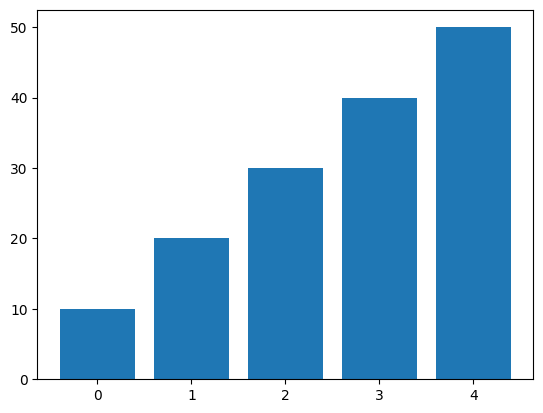

In [29]:
import matplotlib.pyplot as plt
data = [10, 20, 30, 40, 50]

# Create a bar graph
plt.bar(range(len(data)), data)

In [30]:
range(len(data))

range(0, 5)

In [31]:
Furniture_df.sort_values(by="Order Date",inplace=True)



C:\Users\nimis\AppData\Local\Temp\ipykernel_4580\4119009322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Furniture_df.sort_values(by="Order Date",inplace=True)


In [32]:
Furniture_df[Furniture_df['Sub-Category']=="Bookcases"]

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
4938,2015-01-13,2015-01-18,Standard Class,Consumer,San Francisco,California,West,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.9990
6474,2015-01-14,2015-01-15,First Class,Corporate,Philadelphia,Pennsylvania,East,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.9600
5465,2015-01-19,2015-01-20,First Class,Consumer,Scottsdale,Arizona,West,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.4700
8150,2015-01-26,2015-01-29,First Class,Corporate,Rapid City,South Dakota,Central,Furniture,Bookcases,"Safco Value Mate Series Steel Bookcases, Baked...",141.9600
3365,2015-01-31,2015-02-02,First Class,Consumer,Mission Viejo,California,West,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.6660
...,...,...,...,...,...,...,...,...,...,...,...
5473,2018-12-19,2018-12-23,Standard Class,Consumer,Parker,Colorado,West,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,102.0180
3102,2018-12-22,2018-12-27,Second Class,Corporate,Providence,Rhode Island,East,Furniture,Bookcases,"Bush Cubix Collection Bookcases, Fully Assembled",220.9800
688,2018-12-25,2018-12-29,Standard Class,Consumer,New York City,New York,East,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",191.9840
954,2018-12-28,2019-01-01,Standard Class,Consumer,Round Rock,Texas,Central,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",78.8528


In [33]:
Furniture_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [34]:
# Calculate the quarter for each order date
Furniture_df['Quarter'] = Furniture_df['Order Date'].dt.quarter
Furniture_df



C:\Users\nimis\AppData\Local\Temp\ipykernel_4580\3082406099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Furniture_df['Quarter'] = Furniture_df['Order Date'].dt.quarter


,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quarter
7474,2015-01-06,2015-01-10,Standard Class,Home Office,Henderson,Kentucky,South,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,1
7660,2015-01-07,2015-01-12,Standard Class,Consumer,Huntsville,Texas,Central,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,1
866,2015-01-10,2015-01-15,Standard Class,Corporate,Springfield,Virginia,South,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1
716,2015-01-11,2015-01-14,First Class,Consumer,Dover,Delaware,East,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,1
4938,2015-01-13,2015-01-18,Standard Class,Consumer,San Francisco,California,West,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7632,2018-12-29,2019-01-01,Second Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,4
1877,2018-12-29,2019-01-02,Standard Class,Consumer,Los Angeles,California,West,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4
7635,2018-12-29,2019-01-01,Second Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,4
5457,2018-12-29,2019-01-02,Standard Class,Consumer,Edmonds,Washington,West,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,4


In [35]:
Furniture_df['Year'] = Furniture_df['Order Date'].dt.year
Furniture_df

C:\Users\nimis\AppData\Local\Temp\ipykernel_4580\1038269048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Furniture_df['Year'] = Furniture_df['Order Date'].dt.year


,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quarter,Year
7474,2015-01-06,2015-01-10,Standard Class,Home Office,Henderson,Kentucky,South,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,1,2015
7660,2015-01-07,2015-01-12,Standard Class,Consumer,Huntsville,Texas,Central,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,1,2015
866,2015-01-10,2015-01-15,Standard Class,Corporate,Springfield,Virginia,South,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,2015
716,2015-01-11,2015-01-14,First Class,Consumer,Dover,Delaware,East,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,1,2015
4938,2015-01-13,2015-01-18,Standard Class,Consumer,San Francisco,California,West,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,2018-12-29,2019-01-01,Second Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,4,2018
1877,2018-12-29,2019-01-02,Standard Class,Consumer,Los Angeles,California,West,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,2018
7635,2018-12-29,2019-01-01,Second Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,4,2018
5457,2018-12-29,2019-01-02,Standard Class,Consumer,Edmonds,Washington,West,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,4,2018


In [36]:
# Calculate the total sales for each quarter
Furniture_df.groupby(['Sub-Category','Quarter','Year'])['Sales'].sum()

Sub-Category  Quarter  Year
Bookcases     1        2015     2716.5010
                       2016     4330.7240
                       2017     3571.3710
                       2018     3351.8362
              2        2015     1708.7036
                                  ...    
Tables        3        2018    12397.1540
              4        2015    17392.8410
                       2016    15695.4340
                       2017    25442.1200
                       2018    33794.7070
Name: Sales, Length: 64, dtype: float64

In [37]:
df['Month'] = df['Order Date'].dt.month

# Calculate the 3-month sales
three_month_sales = df.groupby('Month')['Sales'].sum()

# Print the 3-month sales
print(three_month_sales)

Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64


In [38]:
Furniture_df[Furniture_df['Quarter']==4]

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quarter,Year
2275,2015-10-03,2015-10-08,Second Class,Corporate,Los Angeles,California,West,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",122.352,4,2015
8218,2015-10-03,2015-10-07,Standard Class,Consumer,Dallas,Texas,Central,Furniture,Furnishings,DAX Natural Wood-Tone Poster Frame,31.776,4,2015
2274,2015-10-03,2015-10-08,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,Bevis Round Conference Room Tables and Bases,143.432,4,2015
1350,2015-10-03,2015-10-08,Second Class,Consumer,Evanston,Illinois,Central,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",258.279,4,2015
6439,2015-10-04,2015-10-06,First Class,Consumer,New York City,New York,East,Furniture,Chairs,Office Star - Contemporary Task Swivel chair w...,589.410,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,2018-12-29,2019-01-01,Second Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,4,2018
1877,2018-12-29,2019-01-02,Standard Class,Consumer,Los Angeles,California,West,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,2018
7635,2018-12-29,2019-01-01,Second Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,4,2018
5457,2018-12-29,2019-01-02,Standard Class,Consumer,Edmonds,Washington,West,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,4,2018
